# Fruit Recognition From Images Using Deep Learning

In this project I introduce a new, high-quality, dataset of images containing fruits. I also present the results of some numerical experiment for training a neural network to detect fruits. I found 3 different datasets which are named Fruits-360, Fruit Recogition[1] and manual[2] downloaded from unsplash.com.
Having a high-quality dataset is essential for obtaining a good classifier. Most of the existing datasets with images  contain both the object and the noisy background. This could lead to cases where changing the background will lead to the incorrect classification of the object. 

I have trained a deep neural network that is capable of identifying fruits from images. The list of fruits are Red Apple, Green apple, banana, strawberry, pear, orange and mandarin.


### Why I choose Fruits for training data ? 
Fruits have certain categories that are hard to differentiate, like the citrus genus, that contains oranges and grapefruits. Thus we want to see how well can an artificial intelligence complete the task of classifying them. Another reason is that fruits are very often found in stores, so they serve as a good starting point for the previously mentioned project. 


### Dataset
<b>Fruit-360</b> images  were obtained by filming the fruits while they are rotated by a motor and then extracting frames. Behind the fruits it was placed a white sheet of paper as background. 
  

<b>Fruit recognition </b>database used in this study is comprising of 44406 fruit images, they are collected in a period of 6 months. I filtered only 7 fruits in all databases. 

<b>Unsplash</b> offers so many professional images which are taken by people who uploaded them to the website. I chose them only for testing my model.

I resized all images to 100x100. My future plan is to work with even larger images, but this will require much more longer training times. 


### 1. Importing Libraries

Firstly,  I load in the libraries I will need the below codes.

In [4]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from keras.utils import to_categorical
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import Callback,ModelCheckpoint,ReduceLROnPlateau
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### 2.Visuliazation Methods

In [6]:
def plot_image_grid(images, rows, columns, figsize = (10, 10)):
    figure = plt.figure(figsize=figsize)
    for i in range(columns * rows):
        figure.add_subplot(rows, columns, i + 1)
        plt.imshow(images[i])
    plt.show()

### 3.Global Variables

In [36]:
IMAGE_SIZE = (100, 100)
EPOCHS = 10
BATCH_SIZE = 32

### 4. Reading  Train Datas in Images

In [18]:
training_datas = list()
training_labels = list()

for dirPath in glob.glob("Training/*"):
    imageLabel = dirPath.split('/')[-1]
    for imagePath in glob.glob(os.path.join(dirPath, '*')):
        image = cv2.imread(imagePath, cv2.IMREAD_COLOR)
        image = cv2.resize(image, IMAGE_SIZE)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        training_datas.append(image)
        training_labels.append(imageLabel)
        
training_datas = np.array(training_datas)
training_labels = np.array(training_labels)

id_to_label = {key : value for key, value in enumerate(np.unique(training_labels))}
label_to_id = {key:value for value, key in id_to_label.items()} 


training_labels = np.array([label_to_id[item] for item in training_labels])

In [19]:
print("training data shape = {1}, training labels shape =  {0}".format(training_labels.shape, training_datas.shape))

training data shape = (60486, 100, 100, 3), training labels shape =  (60486,)


We have 60486 training datas.

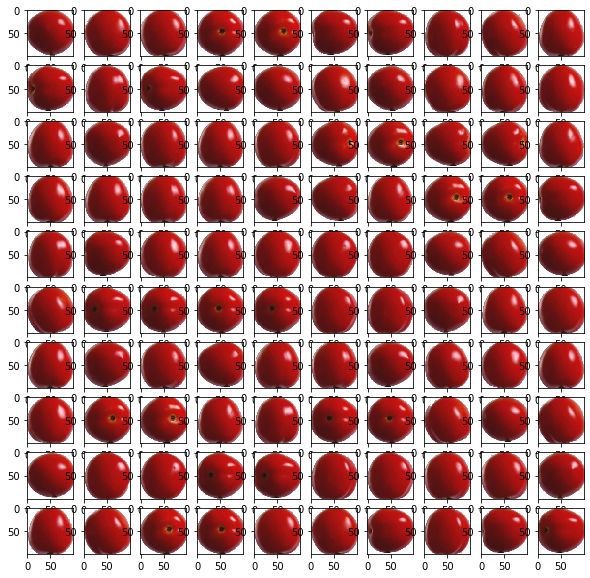

In [20]:
plot_image_grid(training_datas[0:100], 10, 10)

### 5. Reading Validation Datas in Images

In [22]:
validation_datas = list()
validation_labels = list()


for dirPath in glob.glob("Validation/*"):
    imageLabel = dirPath.split('/')[-1]
    for imagePath in glob.glob(os.path.join(dirPath, '*')):
        image = cv2.imread(imagePath, cv2.IMREAD_COLOR)
        image = cv2.resize(image, IMAGE_SIZE)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        validation_datas.append(image)
        validation_labels.append(imageLabel)
        
validation_datas = np.array(validation_datas)
validation_labels = np.array(validation_labels)

validation_labels = np.array([label_to_id[item] for item in validation_labels])

In [23]:
print("validation data shape = {0}, validation labels shape = {1}".format(validation_datas.shape, validation_labels.shape))

validation data shape = (20618, 100, 100, 3), validation labels shape = (20618,)


We have 20618 validation datas.

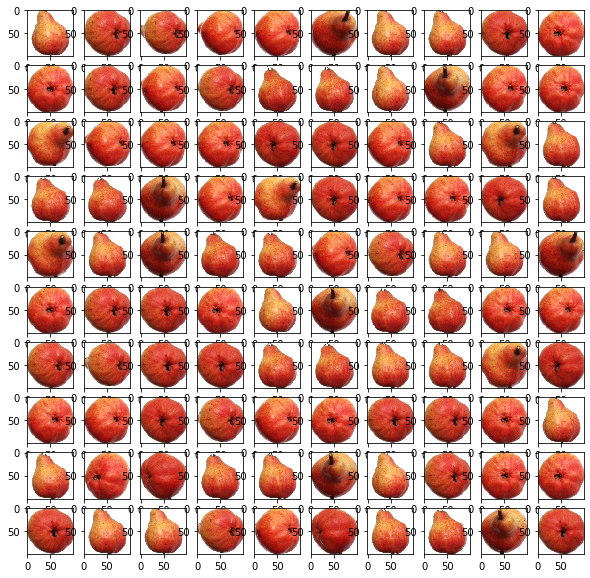

In [24]:
plot_image_grid(validation_datas[1000:1100], 10, 10)

### 6. Reading Test Datas in Images

In [42]:
test_datas = list()
test_labels = list()

for dirPath in glob.glob("Test/*"):
    imageLabel = dirPath.split('/')[-1]
    for imagePath in glob.glob(os.path.join(dirPath, '*')):
        image = cv2.imread(imagePath, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (100, 100))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        test_datas.append(image)
        test_labels.append(imageLabel)
        
test_datas = np.array(test_datas)
test_labels = np.array(test_labels)       

test_labels = np.array([label_to_id[item] for item in test_labels])

In [43]:
print("test data shape = {0}, test labels shape = {1}".format(test_datas.shape, test_labels.shape))

test data shape = (19744, 100, 100, 3), test labels shape = (19744,)


We have 19744 test datas.

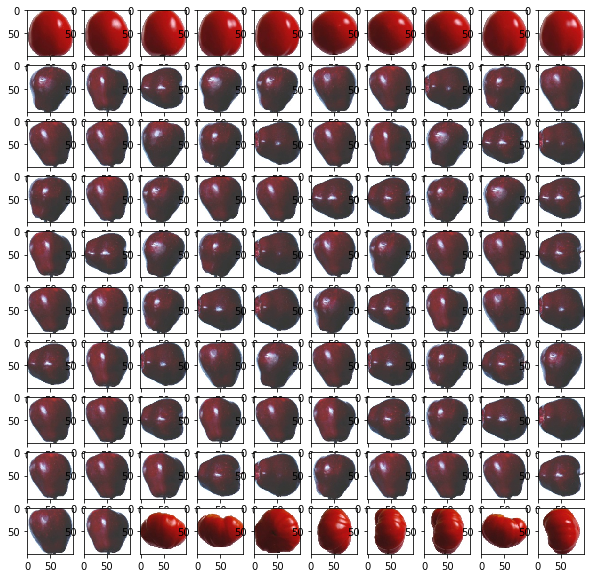

In [44]:
plot_image_grid(test_datas[150: 250], 10, 10)

### 7. Preparing the data for training

In [29]:
#Assign the raw datas to new variables
training_set_x_n, training_set_y_n = training_datas,  training_labels
validation_set_x_n, validation_set_y_n = validation_datas,  validation_labels
test_set_x_n, test_set_y_n = test_datas,  test_labels

In [30]:
#Normalization of the images pixels. All pixels' value are between 0 and 1.
training_set_x_n = training_set_x_n / 255
validation_set_x_n = validation_set_x_n / 255
test_set_x_n = test_set_x_n / 255

In [31]:
#One Hot Encode the Output
training_set_y_n = keras.utils.to_categorical(training_set_y_n)
validation_set_y_n = keras.utils.to_categorical(validation_set_y_n)
test_set_y_n = keras.utils.to_categorical(test_set_y_n)

### 8. Artificial Neural Network Model

In [32]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,Activation,BatchNormalization
from keras.optimizers import Adamax
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K

In [38]:
model = Sequential(name = 'Fruit Classification')
model.add(Conv2D(16, (3, 3), input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(120))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer = Adamax(),
              metrics=['accuracy'])

model.summary()

Model: "Fruit Classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 50, 50, 32

### 9.Image Augmentation

The first time I trained the model, the training data accuracy was %92.2, on the other hand, the validation accuracy was %40.4. It Show tah I had faced overfitting problem. Because of that I have searched the best model to overcome this problem. Image augmentation helped me to solve it. 

In [39]:
image_augmentation = ImageDataGenerator(rotation_range = 20,
                                        horizontal_flip = True,
                                        vertical_flip = True,
                                        shear_range=0.15,
                                        width_shift_range = .3,
                                        height_shift_range =.3,
                                        zoom_range = 0.15,
                                        fill_mode="nearest"
                                       )

### 10.Training the model

In [41]:
model.fit_generator(image_augmentation.flow(training_set_x_n, training_set_y_n, batch_size=BATCH_SIZE),
                    validation_data = (validation_set_x_n, validation_set_y_n),
                    steps_per_epoch = len(training_set_x_n) // BATCH_SIZE,
                    epochs = EPOCHS)

Epoch 1/10
1890/1890 [==============================] - 767s 406ms/step - loss: 1.9357 - accuracy: 0.4302 - val_loss: 2.3367 - val_accuracy: 0.4571
Epoch 2/10
1890/1890 [==============================] - 687s 363ms/step - loss: 1.2941 - accuracy: 0.5963 - val_loss: 1.5429 - val_accuracy: 0.6499
Epoch 3/10
1890/1890 [==============================] - 722s 382ms/step - loss: 0.9932 - accuracy: 0.6820 - val_loss: 1.6841 - val_accuracy: 0.6526
Epoch 4/10
1890/1890 [==============================] - 723s 383ms/step - loss: 0.8256 - accuracy: 0.7313 - val_loss: 1.4968 - val_accuracy: 0.6980
Epoch 5/10
1890/1890 [==============================] - 733s 388ms/step - loss: 0.7124 - accuracy: 0.7660 - val_loss: 0.4807 - val_accuracy: 0.8687
Epoch 6/10
1890/1890 [==============================] - 743s 393ms/step - loss: 0.6337 - accuracy: 0.7908 - val_loss: 0.6258 - val_accuracy: 0.8622
Epoch 7/10
1890/1890 [==============================] - 723s 383ms/step - loss: 0.5599 - accuracy: 0.8150 - val_

### 11.Testing the model

In [56]:
result = model.evaluate(test_set_x_n, test_set_y_n)
for i in range(len(result)):
    print('{} = {}'.format(model.metrics_names[i], result[i]))

19744/19744 [==============================] - 62s 3ms/step
loss = 1.1091404326935028
accuracy = 0.8018638491630554


##### References 
1.	Muresan, H., and Oltean, M. Fruits 360 dataset on github. [Online; accessed 01.05.2020]. 
https://www.kaggle.com/moltean/fruits

2.	Chris Gorgolewski Fruit Recognition dataset on kaggle.  [Online; accessed 01.05.2020].
https://www.kaggle.com/chrisfilo/fruit-recognition

3.	Free fruit images datas. unsplash.com [Online; accessed 02.05.2020]
https://unsplash.com/s/photos/strawberry
4.	Keras. Keras. [Online; accessed 02.05.2020]
